<a href="https://colab.research.google.com/github/sanda-avram/Transformers-on-ROST/blob/main/TkCl/ROST_TkCl_xlm_roberta_udpos28_ro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

In [35]:
from datasets import Dataset
import pandas as pd
train_df=messages = pd.read_csv('trainSet1.csv', sep=',', names=["label", "text"])
test_df=messages = pd.read_csv('testSet1.csv', sep=',', names=["label", "text"])


train_ds = Dataset.from_pandas(train_df, split="train")
test_ds = Dataset.from_pandas(test_df, split="test")

model_name = "wietsedv/xlm-roberta-base-ft-udpos28-ro"

In [ ]:
!pip install transformers

In [36]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(model_name)

loading file sentencepiece.bpe.model from cache at None
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--wietsedv--xlm-roberta-base-ft-udpos28-ro/snapshots/566c9f3700d2a7303cf80c6eb1ed0aba1c346540/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--wietsedv--xlm-roberta-base-ft-udpos28-ro/snapshots/566c9f3700d2a7303cf80c6eb1ed0aba1c346540/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--wietsedv--xlm-roberta-base-ft-udpos28-ro/snapshots/566c9f3700d2a7303cf80c6eb1ed0aba1c346540/tokenizer_config.json


In [37]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

train_dataset = train_ds.map(tokenize_function, batched=True)
test_dataset = test_ds.map(tokenize_function, batched=True)

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [39]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=10)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--wietsedv--xlm-roberta-base-ft-udpos28-ro/snapshots/566c9f3700d2a7303cf80c6eb1ed0aba1c346540/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "wietsedv/xlm-roberta-base-ft-udpos28-ro",
  "architectures": [
    "XLMRobertaForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "

In [ ]:
!pip install evaluate


In [40]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="testTrainer", evaluation_strategy="epoch")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [41]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

In [42]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 5411
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2031
  Number of trainable parameters = 278051338


Epoch,Training Loss,Validation Loss,Accuracy
1,1.887800,1.899228,0.350457
2,1.115300,1.166613,0.637579
3,0.276300,0.944676,0.759324


Saving model checkpoint to testTrainer/checkpoint-500
Configuration saved in testTrainer/checkpoint-500/config.json
Model weights saved in testTrainer/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1421
  Batch size = 8
Saving model checkpoint to testTrainer/checkpoint-1000
Configuration saved in testTrainer/checkpoint-1000/config.json
Model weights saved in testTrainer/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evalu

TrainOutput(global_step=2031, training_loss=0.9498544739479504, metrics={'train_runtime': 285.7786, 'train_samples_per_second': 56.803, 'train_steps_per_second': 7.107, 'total_flos': 2135694274108416.0, 'train_loss': 0.9498544739479504, 'epoch': 3.0})

In [43]:
trainer.evaluate(trainer.eval_dataset)

The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1421
  Batch size = 8


{'eval_loss': 0.9446756839752197,
 'eval_accuracy': 0.7593244194229416,
 'eval_runtime': 5.6922,
 'eval_samples_per_second': 249.641,
 'eval_steps_per_second': 31.271,
 'epoch': 3.0}

In [44]:
predicted=trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1421
  Batch size = 8


In [45]:
c=0
y=[]
for v in predicted.predictions:
  c+=1

  max = v[0]
  index = 0
  for i in range(1,len(v)):
    if v[i] > max:
      max = v[i]
      index = i
  y.append(index)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm=confusion_matrix(test_dataset['label'], y)
print(cm)
accuracy = accuracy_score(test_dataset['label'], y)
print("accuracy:", accuracy)
# Calculate macro-accuracy
#macro_accuracy = np.mean(np.diag(cm))

#print("Macro-accuracy:", macro_accuracy/10)
from sklearn.metrics import classification_report

print(classification_report(test_dataset['label'], y, digits=3))

[[ 52   3   1   0   2   4   0   0   2  10]
 [  6 137   8  13   8   2   0   1  36   5]
 [  0   4 210   7   1   0   1   9   6   4]
 [  3   4   0  72   1   5   0   0   0   1]
 [  1   2   0   0  22   0   0   1   5   3]
 [  7   3   0   2   2 156   0   0   2  13]
 [  0   1   0   0   4   0   2  12   4   2]
 [  0   0   0   0   0   0   0  67   8   2]
 [  3   6   0   1  12   0   0   0 137  17]
 [ 22   5   1   0   7  37   0   2   8 224]]
accuracy: 0.7593244194229416
              precision    recall  f1-score   support

           0      0.553     0.703     0.619        74
           1      0.830     0.634     0.719       216
           2      0.955     0.868     0.909       242
           3      0.758     0.837     0.796        86
           4      0.373     0.647     0.473        34
           5      0.765     0.843     0.802       185
           6      0.667     0.080     0.143        25
           7      0.728     0.870     0.793        77
           8      0.659     0.778     0.714       176

In [47]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(test_dataset['label'], y)

0.6992807030931332

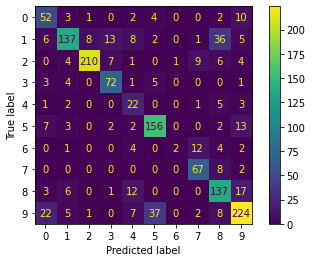

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
 

In [ ]:
!kill 7123
%reload_ext tensorboard
%tensorboard --logdir ./testTrainer/
